Let's compare word embeddings from different corpora by visualizing the relationships between words.

Let's start by getting our environment ready.

In [1]:
from text_analytics import TextAnalytics
import os
import pandas as pd

ai = TextAnalytics()
ai.data_dir = os.path.join(".", "data")
print("Done!")

Done!


We'll load pre-trained word embeddings. Here we are using embeddings without part-of-speech tags. If you *did* want to do it yourself, here's the code, commented out. And you can see a more detailed recipe in the *text_analytics* package.

In [2]:
file = os.path.join(ai.data_dir, "economic.nyt.1931-2016.gz")
nyt_word_vectors = ai.deserialize("w2v_embedding", file + ".lex_only.w2v_embedding.json")
nyt_word_vectors_vocab = ai.deserialize("w2v_vocab", file + ".lex_only.w2v_vocab.json")
    
print(nyt_word_vectors)
print(list(nyt_word_vectors_vocab.keys())[0:20])

[[-0.06299999  0.07947273  0.0401363  ... -0.03059959 -0.00951996
  -0.06459376]
 [-0.04394805  0.06427792  0.11873838 ...  0.03227458  0.09852331
  -0.02534213]
 [-0.00149538  0.16307357  0.16590007 ... -0.0593612   0.09060597
  -0.01625741]
 ...
 [-0.19475771  0.09054728  0.25081506 ... -0.04206347 -0.09087317
   0.01764593]
 [-0.02526552 -0.06752995  0.0294262  ... -0.01645222 -0.03179419
   0.03135042]
 [-0.07107804 -0.03533437 -0.0161457  ...  0.01807991 -0.02053553
   0.07141624]]
['the', 'of', 'a', 'and', 'to', 'in', 'number', 'for', 'that', 'on', 'at', 'is', 'by', 'was', 'with', 'as', 'new', 'his', 'from', 'it']


We have now loaded the embeddings for the vocabulary. These embeddings are trained on lead paragraphs from *The New York Times* from 1931 to 2016. Now let's get some others to compare them with.

In [3]:
file = os.path.join(ai.data_dir, "economic.congress.1931-2016.gz")
congress_word_vectors = ai.deserialize("w2v_embedding", file + ".lex_only.w2v_embedding.json")
congress_word_vectors_vocab = ai.deserialize("w2v_vocab", file + ".lex_only.w2v_vocab.json")
    
print(congress_word_vectors)
print(list(congress_word_vectors_vocab.keys())[0:20])

file = os.path.join(ai.data_dir, "sociolinguistics.english_all.gz")
socio_word_vectors = ai.deserialize("w2v_embedding", file + ".lex_only.w2v_embedding.json")
socio_word_vectors_vocab = ai.deserialize("w2v_vocab", file + ".lex_only.w2v_vocab.json")
    
print(socio_word_vectors)
print(list(socio_word_vectors_vocab.keys())[0:20])

file = os.path.join(ai.data_dir, "stylistics.gutenberg_all.gz")
pg_word_vectors = ai.deserialize("w2v_embedding", file + ".lex_only.w2v_embedding.json")
pg_word_vectors_vocab = ai.deserialize("w2v_vocab", file + ".lex_only.w2v_vocab.json")
    
print(pg_word_vectors)
print(list(pg_word_vectors_vocab.keys())[0:20])

file = os.path.join(ai.data_dir, "economic.hotel_reviews.gz")
hotel_word_vectors = ai.deserialize("w2v_embedding", file + ".lex_only.w2v_embedding.json")
hotel_word_vectors_vocab = ai.deserialize("w2v_vocab", file + ".lex_only.w2v_vocab.json")
    
print(hotel_word_vectors)
print(list(hotel_word_vectors_vocab.keys())[0:20])

[[ 0.12996759 -0.04119075  0.11625136 ...  0.1024373  -0.07774138
  -0.09594914]
 [ 0.16631457 -0.0064401   0.21851963 ...  0.04153391 -0.06634763
  -0.06577659]
 [ 0.28316206  0.0799558   0.10569964 ... -0.0495805  -0.15108101
  -0.14238696]
 ...
 [ 0.02350432  0.00554276  0.20351361 ... -0.2508781   0.10376185
  -0.0089024 ]
 [ 0.04374084  0.06962304 -0.06937325 ...  0.16237937  0.07453305
   0.02180615]
 [ 0.01508431 -0.00148335  0.12770014 ...  0.00640929  0.06754814
   0.02095785]]
['the', 'of', 'to', 'and', 'in', 'that', 'a', 'i', 'is', 'number', 'this', 'for', 'it', 'we', 'be', 'have', 'on', 'not', 'as', 'are']
[[ 0.02562547 -0.12505892 -0.0611533  ... -0.10608659  0.00328061
   0.0689163 ]
 [ 0.0982582  -0.05569987 -0.0137266  ... -0.14571962  0.04492021
   0.0499051 ]
 [ 0.02195907 -0.16132937 -0.04240015 ... -0.13090234  0.00615026
   0.09521095]
 ...
 [ 0.04141416 -0.05513437  0.01968002 ... -0.11194862  0.11899749
   0.01177979]
 [-0.014961   -0.0834965  -0.13771939 ... -0.

Let's make a function for randomly choosing a word that is present in all data sets.

In [4]:
nyt_words = list(nyt_word_vectors_vocab.keys())
congress_words = list(congress_word_vectors_vocab.keys())
socio_words = list(socio_word_vectors_vocab.keys())
pg_words = list(pg_word_vectors_vocab.keys())
hotel_words = list(hotel_word_vectors_vocab.keys())

import random

def get_word():
    
    while True:
        sample = random.choice(nyt_words)
        if sample in congress_words:
            if sample in socio_words:
                if sample in pg_words:
                    if sample in hotel_words:
                        return sample
    
print(get_word())

lecturing


Now we are going to visualize these embeddings by first using PCA (Principal Components Analysis) to reduce the 100 dimensions embeddings to two dimensions that we can use for *x* and *y*.

In [5]:
from sklearn.decomposition import PCA

print(nyt_word_vectors.shape)
nyt_pca = PCA(n_components=2)
nyt_word_vectors2 = nyt_pca.fit_transform(nyt_word_vectors)
print(nyt_word_vectors2.shape)

(207661, 100)
(207661, 2)


And there you go! Now let's do that same transformation for each set of embeddings.

In [6]:
print(congress_word_vectors.shape)
congress_pca = PCA(n_components=2)
congress_word_vectors2 = congress_pca.fit_transform(congress_word_vectors)
print(congress_word_vectors2.shape)

print(socio_word_vectors.shape)
socio_pca = PCA(n_components=2)
socio_word_vectors2 = socio_pca.fit_transform(socio_word_vectors)
print(socio_word_vectors2.shape)

print(pg_word_vectors.shape)
pg_pca = PCA(n_components=2)
pg_word_vectors2 = pg_pca.fit_transform(pg_word_vectors)
print(pg_word_vectors2.shape)

(165460, 100)
(165460, 2)
(408283, 100)
(408283, 2)
(234865, 100)
(234865, 2)


Now, let's choose a number of words that are present in all datasets.

In [7]:
words = []
nyt_indexes = []
congress_indexes = []
pg_indexes = []
socio_indexes = []

#Get random words
#for i in range(15):
#    word = get_word()
#    print(word)
#    words.append(word)

#Use pre-defined words
words = ['american','national','law','public','tax','war','foreign','security','military','energy']
for word in words:
    nyt_indexes.append(nyt_word_vectors_vocab[word])
    congress_indexes.append(congress_word_vectors_vocab[word])
    pg_indexes.append(pg_word_vectors_vocab[word])
    socio_indexes.append(socio_word_vectors_vocab[word])

Then we make a graph.

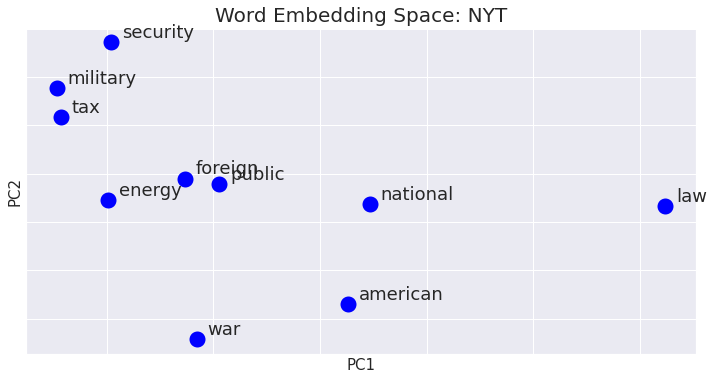

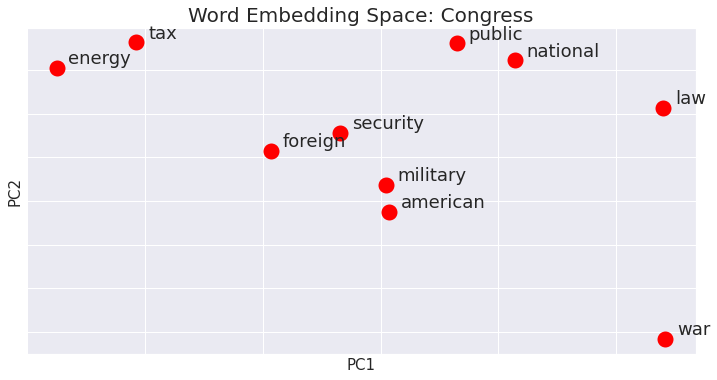

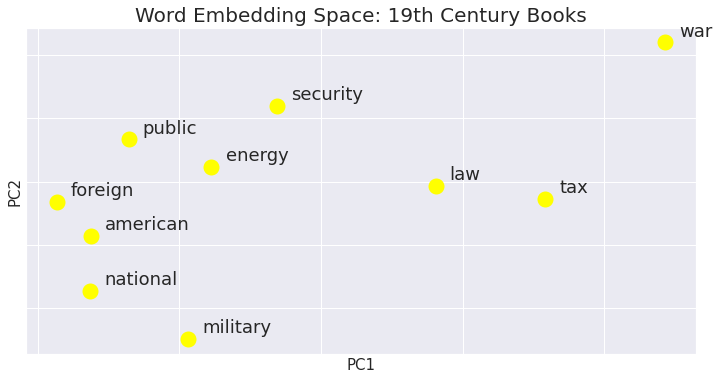

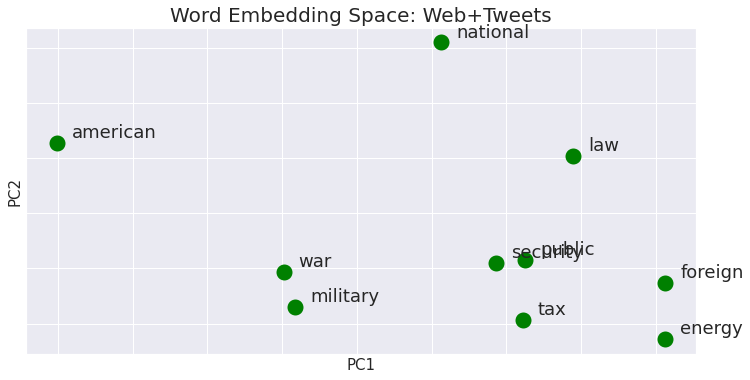

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=1.5)
adjust = 0.005

#NYT
plt.figure(figsize=(12,6))
plt.scatter(nyt_word_vectors2[nyt_indexes,0],nyt_word_vectors2[nyt_indexes,1],linewidths=10,color='blue')
plt.xlabel("PC1",size=15)
plt.ylabel("PC2",size=15)
plt.title("Word Embedding Space: NYT",size=20)
plt.tick_params(left=False, bottom=False, labelleft=False, labelbottom=False)

for i, word in enumerate(words):
    plt.annotate(word,xy=(nyt_word_vectors2[nyt_indexes[i],0]+adjust,nyt_word_vectors2[nyt_indexes[i],1]+adjust))
    
#Congress
plt.figure(figsize=(12,6))
plt.scatter(congress_word_vectors2[congress_indexes,0],congress_word_vectors2[congress_indexes,1],linewidths=10,color='red')
plt.xlabel("PC1",size=15)
plt.ylabel("PC2",size=15)
plt.title("Word Embedding Space: Congress",size=20)
plt.tick_params(left=False, bottom=False, labelleft=False, labelbottom=False)

for i, word in enumerate(words):
    plt.annotate(word,xy=(congress_word_vectors2[congress_indexes[i],0]+adjust,congress_word_vectors2[congress_indexes[i],1]+adjust))
    
#PG
plt.figure(figsize=(12,6))
plt.scatter(pg_word_vectors2[pg_indexes,0],pg_word_vectors2[pg_indexes,1],linewidths=10,color='yellow')
plt.xlabel("PC1",size=15)
plt.ylabel("PC2",size=15)
plt.title("Word Embedding Space: 19th Century Books",size=20)
plt.tick_params(left=False, bottom=False, labelleft=False, labelbottom=False)

for i, word in enumerate(words):
    plt.annotate(word,xy=(pg_word_vectors2[pg_indexes[i],0]+adjust,pg_word_vectors2[pg_indexes[i],1]+adjust))
    
#Socio
plt.figure(figsize=(12,6))
plt.scatter(socio_word_vectors2[socio_indexes,0],socio_word_vectors2[socio_indexes,1],linewidths=10,color='green')
plt.xlabel("PC1",size=15)
plt.ylabel("PC2",size=15)
plt.title("Word Embedding Space: Web+Tweets",size=20)
plt.tick_params(left=False, bottom=False, labelleft=False, labelbottom=False)

for i, word in enumerate(words):
    plt.annotate(word,xy=(socio_word_vectors2[socio_indexes[i],0]+adjust,socio_word_vectors2[socio_indexes[i],1]+adjust))

As we explore different random sets of words across these embeddings, we realize that the relationships, reduced to two dimensions, are not actually meaningful. Because they change so much across corpora. However, we have also reduced a 100 dimensional representation to 2 dimensions. Let's try a different approach.

This time we will take 50 random words that are shared across all datasets. For each word, we will find the 50 closest words in its embedding space. We will then measure the overlap for each pair of corpora. For example, if NYT and Congress share the most similar words, they will have a high overlap. This is a similar evaluation as above, except that it doesn't require us to visually process a large number of examples, and it doesn't reduce the dimensionality. It also includes more words, so that we aren't basing the results on a few random examples.

In [9]:
nyt_closest = []
congress_closest = []
pg_closest = []
socio_closest = []
hotel_closest = []

n_closest = 5
i = 1
top_words = ['american', 'act', 'me', 'make', 'speaker', 'say', 'over', 'into', 'legislation', 'gentleman', 'also', 'before', 'could', 'today', 'going', 'know', 'national', 'just', 'percent', 'law', 'want', 'must', 'great', 'public', 'here', 'first', 'most', 'support', 'million', 'like', 'members', 'believe', 'take', 'does', 'said', 'work', 'get', 'last', 'well', 'then', 'way', 'fact', 'world', 'tax', 'war', 'vote', 'much', 'need', 'every', 'money', 'being', 'where', 'through', 'did', 'department', 'go', 'ask', 'point', 'even', 'right', 'him', 'after', 'upon', 'important', 'service', 'same', 'budget', 'against', 'how', 'administration', 'good', 'two', 'let', 'question', 'report', 'part', 'come', 'record', 'without', 'nation', 'during', 'system', 'both', 'matter', 'own', 'business', 'order', 'resolution', 'present', 'health', 'provide', 'programs', 'shall', 'back', 'hope', 'power', 'use', 'foreign', 'billion', 'pay', 'general', 'colleagues', 'see', 'policy', 'give', 'action', 'nations', 'cost', 'since', 'while', 'whether', 'done', 'however', 'might', 'secretary', 'economic', 'problem', 'distinguished', 'why', 'member', 'increase', 'long', 'security', 'defense', 'another', 'military', 'down', 'funds', 'day', 'interest', 'put', 'america', 'care', 'issue', 'again', 'between', 'able', 'section', 'help', 'further', 'case', 'each', 'court', 'men', 'senators', 'education', 'floor', 'industry', 'consent', 'district', 'necessary', 'course', 'small', 'rights', 'situation', 'energy', 'conference', 'office', 'passed', 'unanimous', 'yield', 'opportunity', 'few', 'far', 'development', 'amount', 'commission', 'too', 'ago', 'man', 'control', 'thank', 'area', 'services', 'within', 'problems', 'find', 'americans', 'given', 'future', 'york', 'continue', 'labor', 'little', 'consideration', 'already', 'used', 'statement', 'children', 'certain', 'place', 'washington', 'authority', 'proposed', 'still', 'better', 'amendments', 'debate', 'purpose', 'local',]

for word in top_words:

    print(i, word)
    i += 1
    
    #NYT
    target, top50 = ai.linguistic_distance(x=nyt_word_vectors, y=nyt_words, sample=nyt_word_vectors_vocab[word], n=n_closest, metric="cosine")
    nyt_closest.append(top50)
    
    #Congress
    target, top50 = ai.linguistic_distance(x=congress_word_vectors, y=congress_words, sample=congress_word_vectors_vocab[word], n=n_closest, metric="cosine")
    congress_closest.append(top50)
    
    #Socio
    target, top50 = ai.linguistic_distance(x=socio_word_vectors, y=socio_words, sample=socio_word_vectors_vocab[word], n=n_closest, metric="cosine")
    socio_closest.append(top50)
    
    #PG
    target, top50 = ai.linguistic_distance(x=pg_word_vectors, y=pg_words, sample=pg_word_vectors_vocab[word], n=n_closest, metric="cosine")
    pg_closest.append(top50)
    
    #Hotels
    target, top50 = ai.linguistic_distance(x=hotel_word_vectors, y=hotel_words, sample=hotel_word_vectors_vocab[word], n=n_closest, metric="cosine")
    hotel_closest.append(top50)

1 american
2 act
3 me
4 make
5 speaker
6 say
7 over
8 into
9 legislation
10 gentleman
11 also
12 before
13 could
14 today
15 going
16 know
17 national
18 just
19 percent
20 law
21 want
22 must
23 great
24 public
25 here
26 first
27 most
28 support
29 million
30 like
31 members
32 believe
33 take
34 does
35 said
36 work
37 get
38 last
39 well
40 then
41 way
42 fact
43 world
44 tax
45 war
46 vote
47 much
48 need
49 every
50 money
51 being
52 where
53 through
54 did
55 department
56 go
57 ask
58 point
59 even
60 right
61 him
62 after
63 upon
64 important
65 service
66 same
67 budget
68 against
69 how
70 administration
71 good
72 two
73 let
74 question
75 report
76 part
77 come
78 record
79 without
80 nation
81 during
82 system
83 both
84 matter
85 own
86 business
87 order
88 resolution
89 present
90 health
91 provide
92 programs
93 shall
94 back
95 hope
96 power
97 use
98 foreign
99 billion
100 pay
101 general
102 colleagues
103 see
104 policy
105 give
106 action
107 nations
108 cost
109 

Now we define a function to calculate the distance between two sets of words.

In [10]:
from scipy.spatial.distance import jaccard

def get_jaccard(words1, words2):
    
    #Get the whole vocabulary
    vocab = list(set(words1+words2))
    
    #Convert each word list to a boolean vector
    words1 = [1 if x in words1 else 0 for x in vocab]
    words2 = [1 if x in words2 else 0 for x in vocab]
    
    return 1 - jaccard(words1, words2)

Now let's use that distance function to get the average distance between the embeddings from each corpus.

In [11]:
import statistics

def get_embedding_distance(closest1, closest2):
    
    results = []
    
    for i in range(len(closest1)):
        results.append(get_jaccard(closest1[i], closest2[i]))

    return statistics.mean(results)
        

In [12]:
all_values = []

for m in [nyt_closest, congress_closest, pg_closest, socio_closest, hotel_closest]:
    row_values = []
    
    for n in [nyt_closest, congress_closest, pg_closest, socio_closest, hotel_closest]:
        row_values.append(get_embedding_distance(m, n))
        
    all_values.append(row_values)

df = pd.DataFrame(all_values)
df.columns=["NYT", "Congress", "Books", "Digital", "Hotels"]
df.index=["NYT", "Congress", "Books", "Digital", "Hotels"]
print(df)

               NYT  Congress     Books   Digital    Hotels
NYT       1.000000  0.182937  0.130893  0.166766  0.107758
Congress  0.182937  1.000000  0.117738  0.164782  0.114623
Books     0.130893  0.117738  1.000000  0.155179  0.087163
Digital   0.166766  0.164782  0.155179  1.000000  0.149444
Hotels    0.107758  0.114623  0.087163  0.149444  1.000000


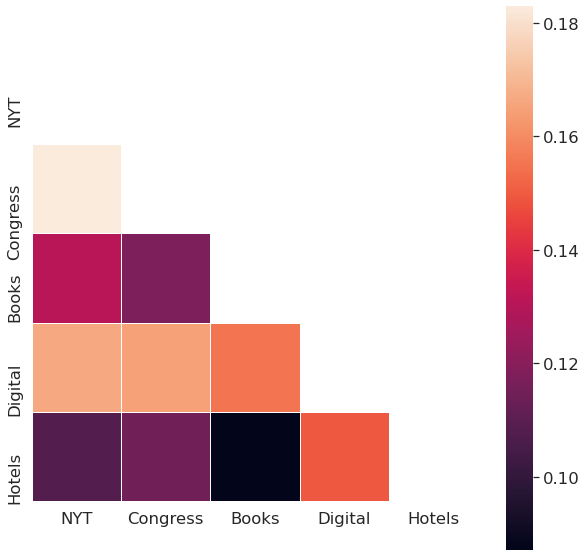

In [13]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

mask = np.zeros_like(df)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(10, 10))
    ax = sns.heatmap(df, mask=mask, square=True, linewidths=1)
    
sns.set(font_scale=2)